## Online Shoppers Intentions to predict the visitor is revenue generator or not
### By Aaditya Mahindrakar

In [1]:
# importing basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

In [2]:
# importing dataset
df = pd.read_csv('online_shoppers_intention (1).csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
import dtale
import dtale.app as dtale_app
dtale.show(df)
#!pip install dataprep
#import dataprep

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [5]:
df.shape

(12330, 18)

In [6]:
df.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
df['Administrative_Duration'].unique()

array([  0.       ,  53.       ,  64.6      , ..., 167.9107143,
       305.125    , 150.3571429])

In [8]:
df['SpecialDay (probability)'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [9]:
print(df['Month'].unique())
print(df['OperatingSystems'].unique())
print(df['Browser'].unique())
print(df['Region'].unique())
print(df['TrafficType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
[1 2 4 3 7 6 8 5]
[ 1  2  3  4  5  6  7 10  8  9 12 13 11]
[1 9 2 3 4 5 6 7 8]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


In [10]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [11]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

### Visualization of the data

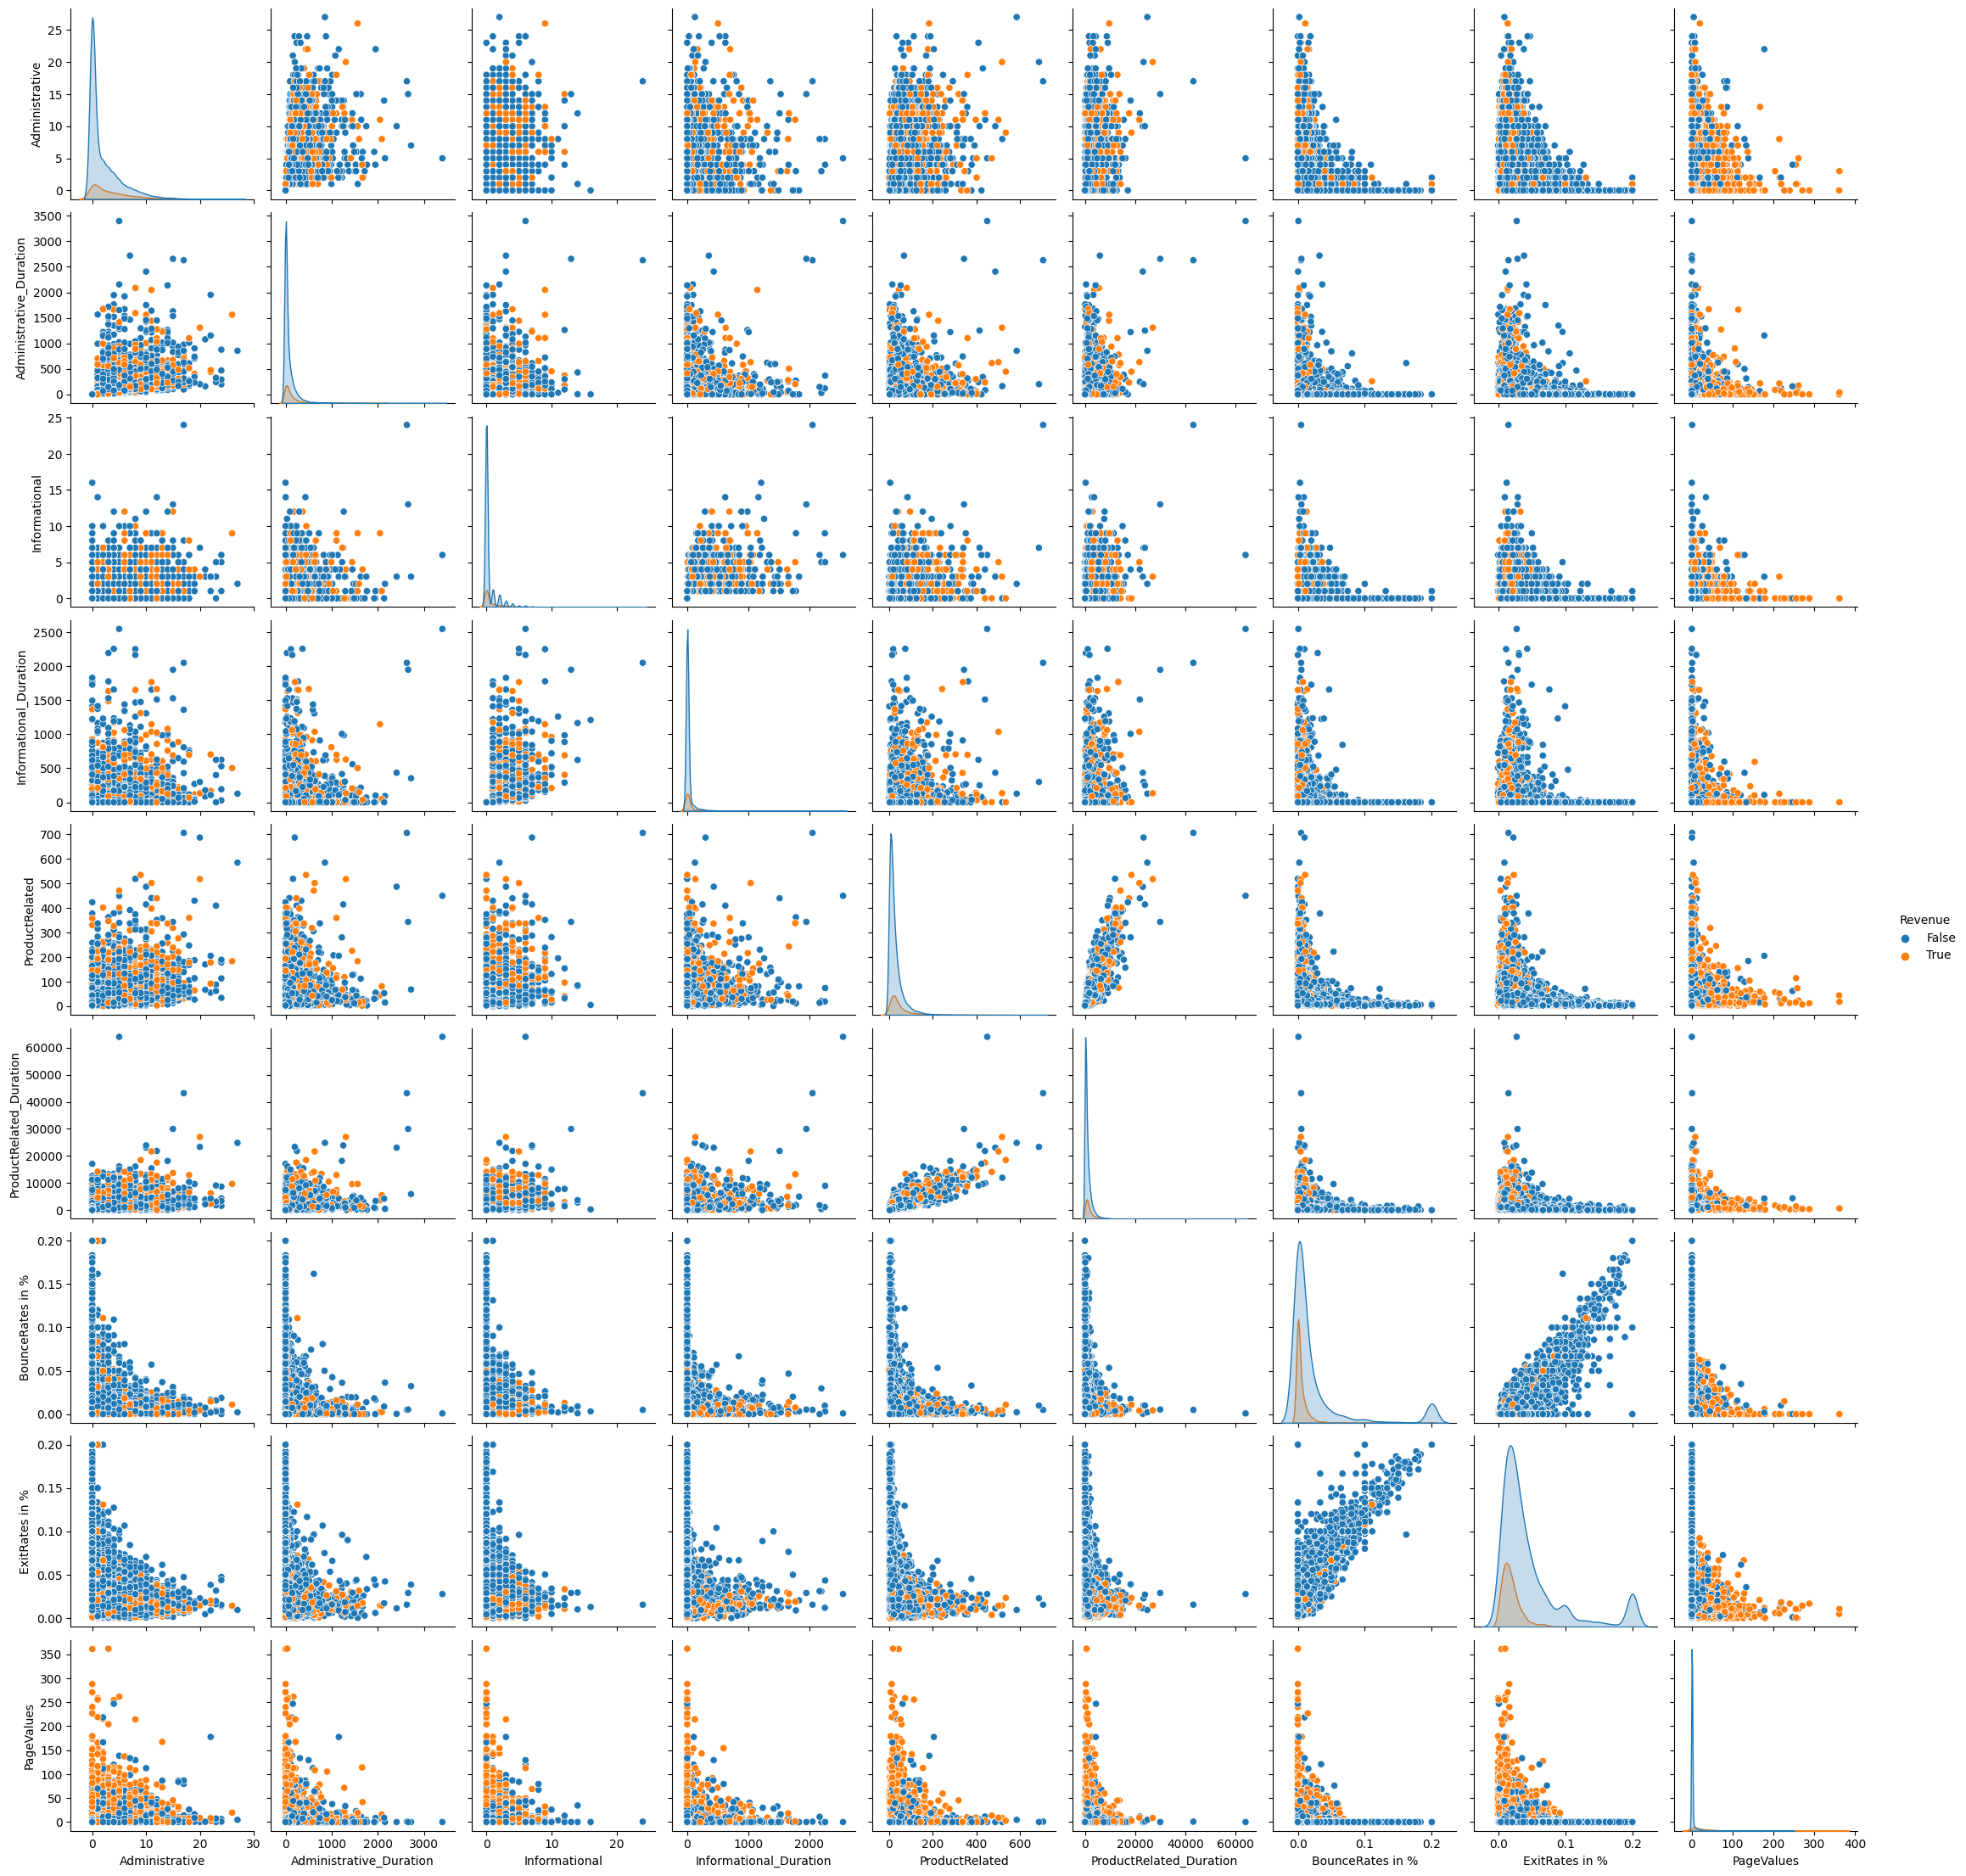

In [12]:
sns.pairplot(df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                 'ProductRelated', 'ProductRelated_Duration','BounceRates in %', 'ExitRates in %', 
                 'PageValues','Revenue']], hue='Revenue')

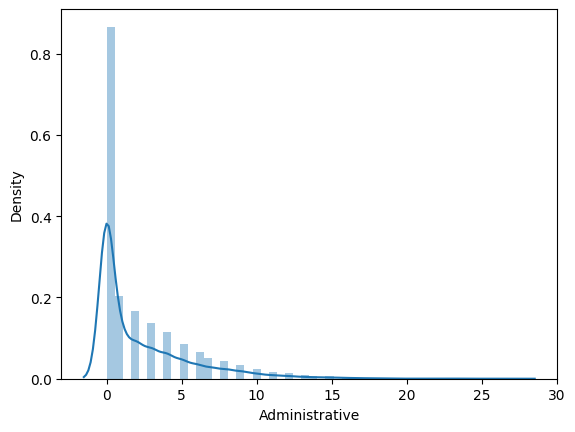

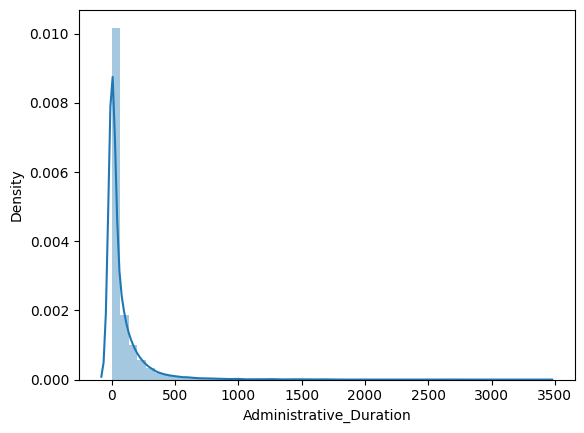

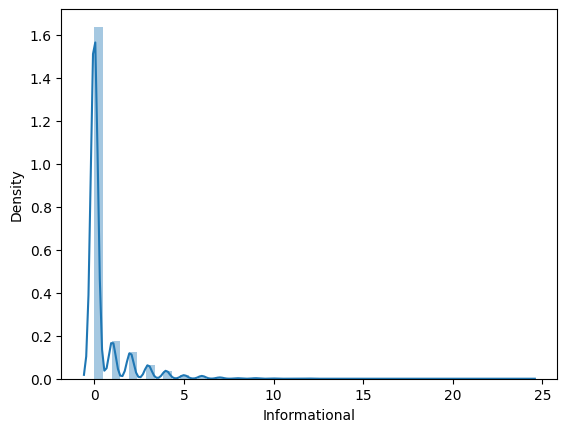

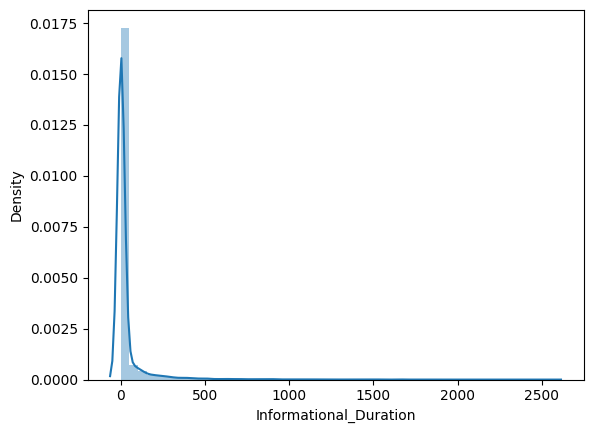

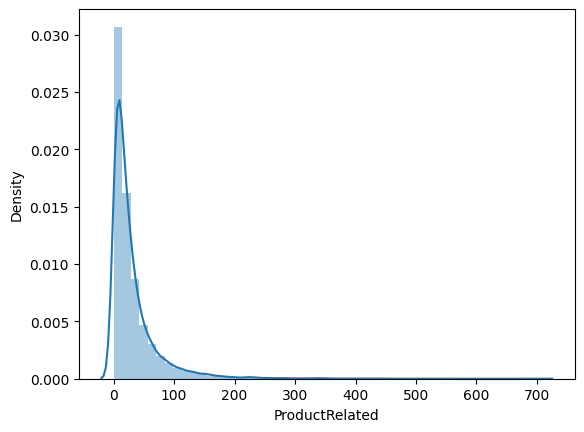

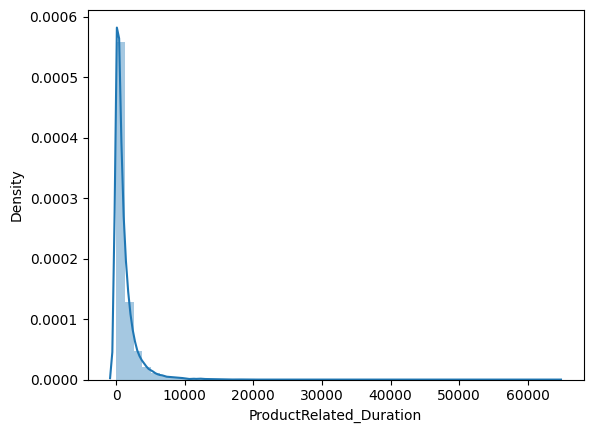

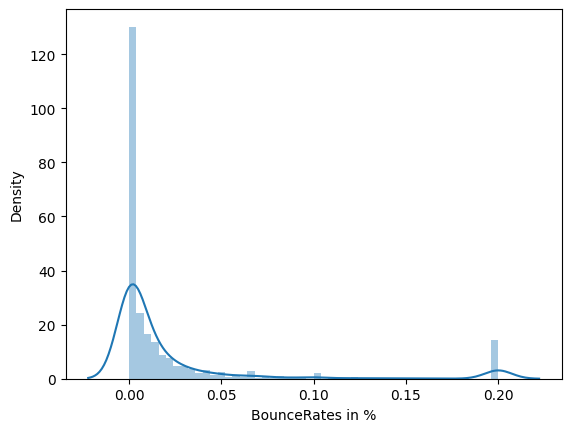

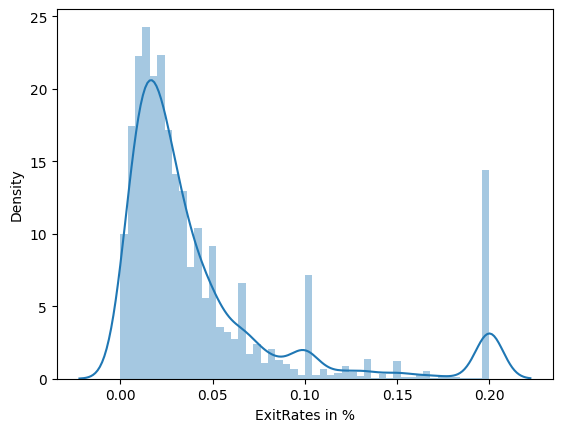

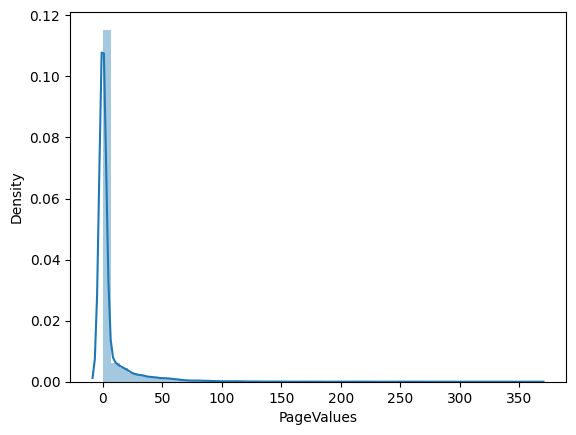

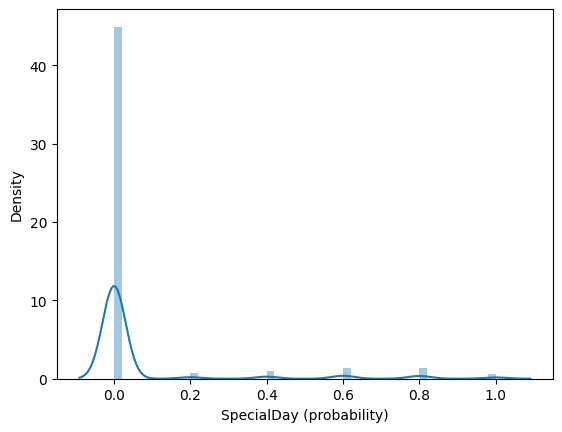

ValueError: could not convert string to float: 'Feb'

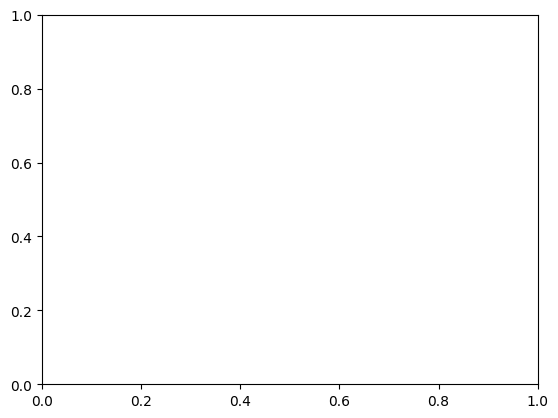

In [13]:
# Finding the distribution plot just for glance
def distplot(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns):
    distplot(i)

<AxesSubplot: >

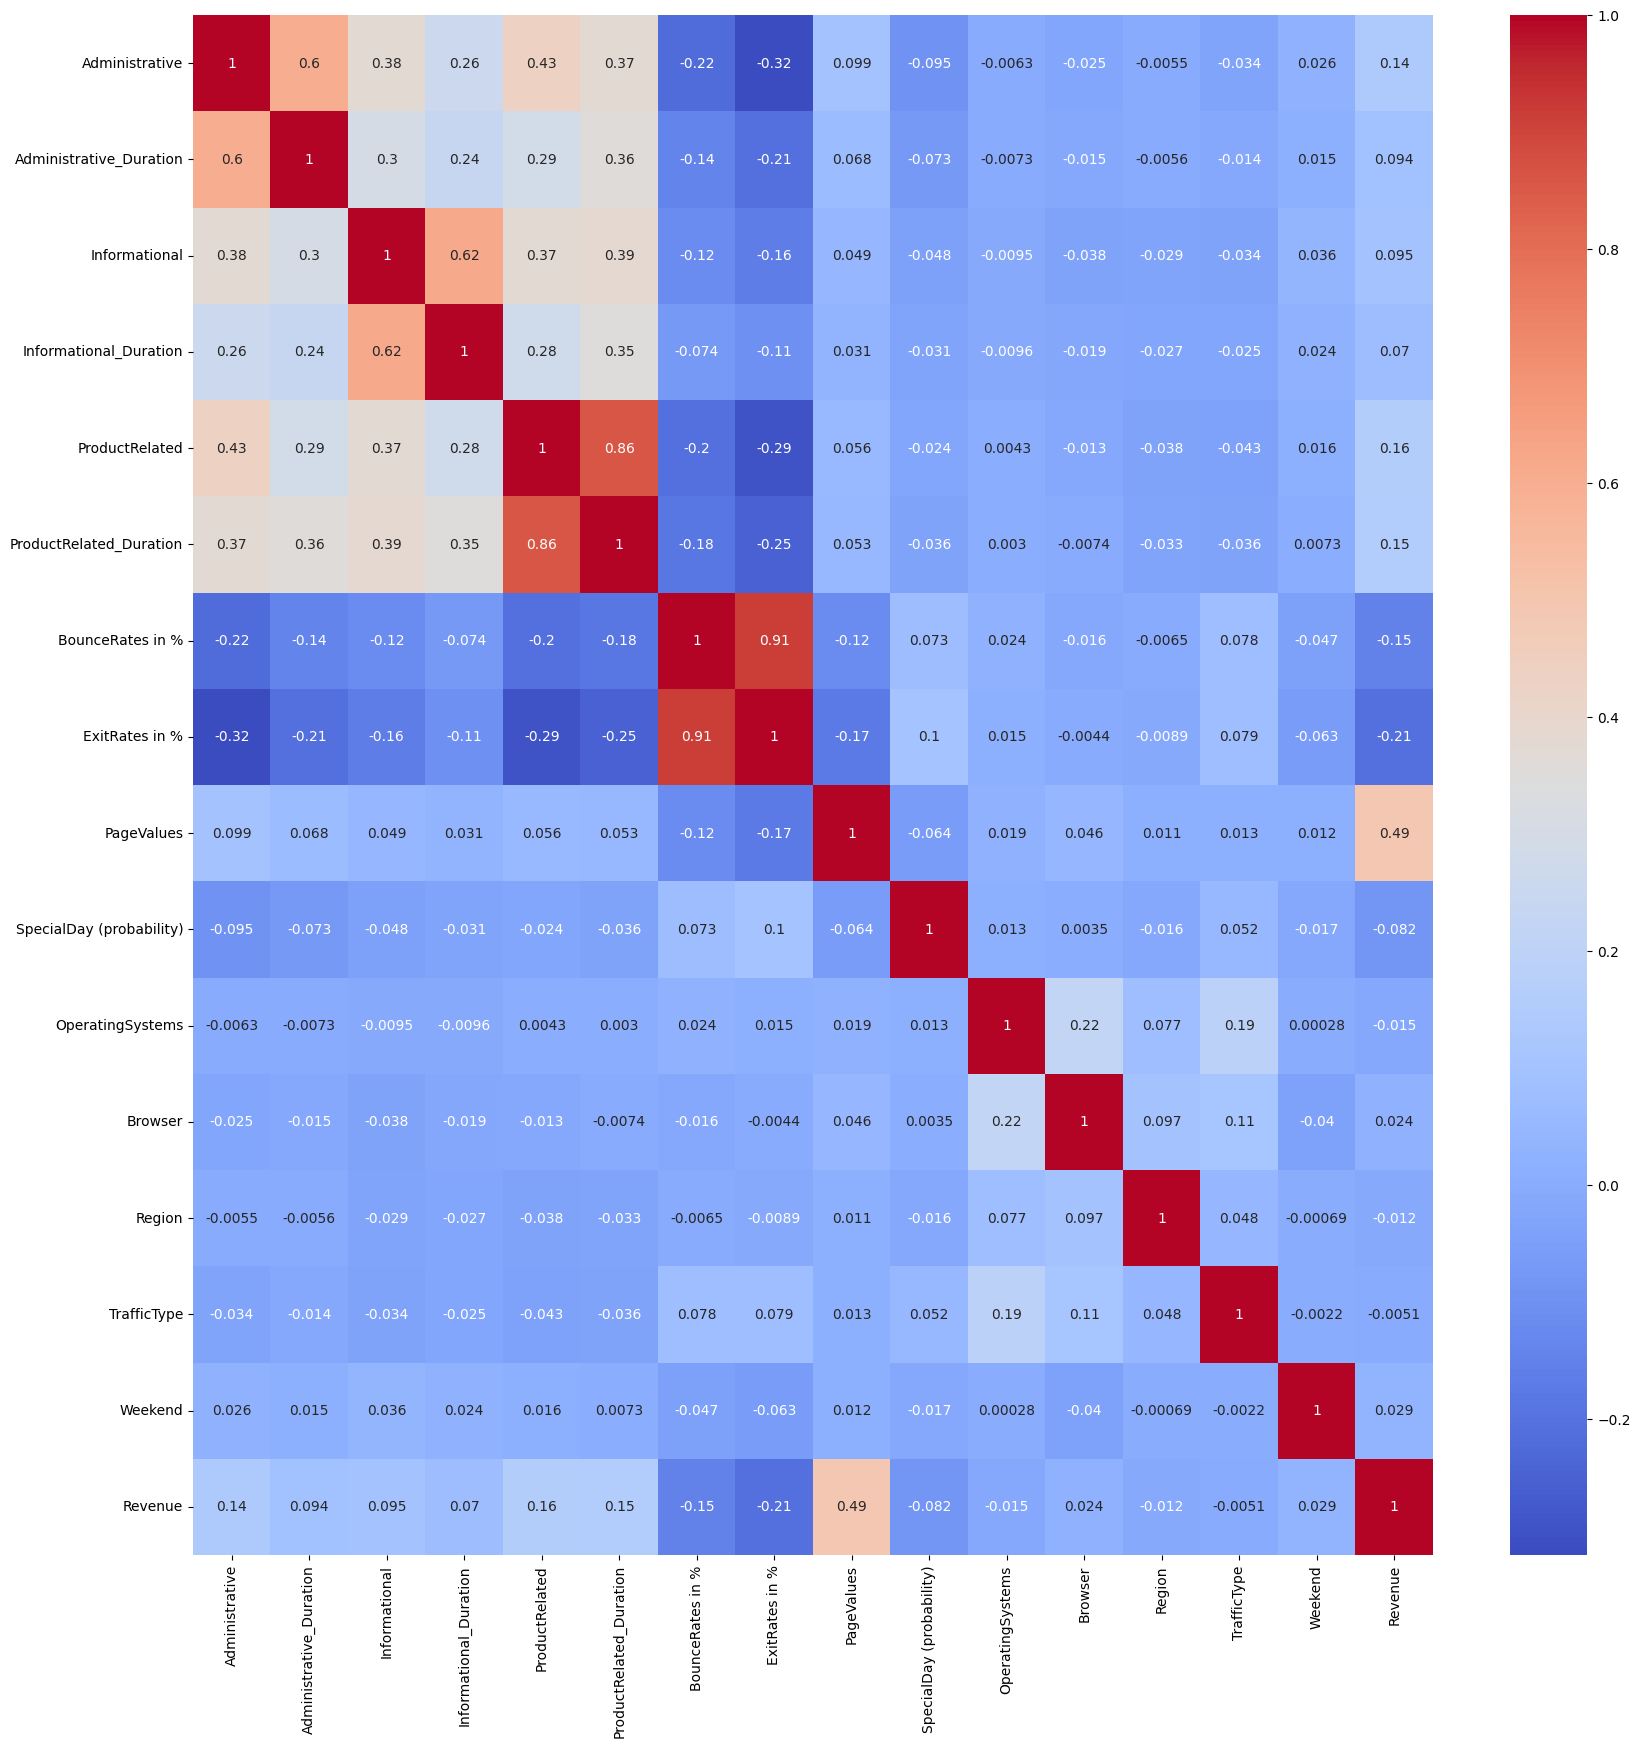

In [14]:
# finding the correlation in variables
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='Revenue', ylabel='count'>

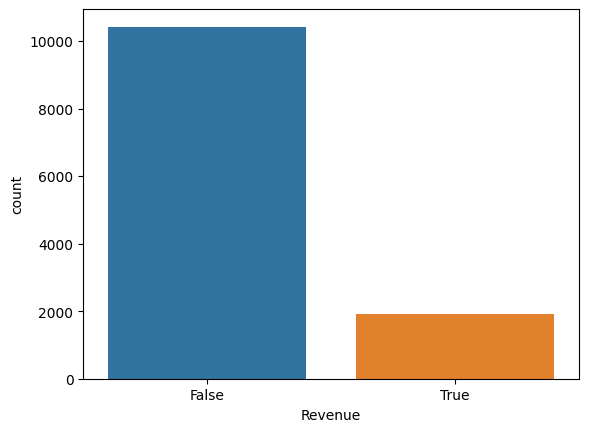

In [15]:
sns.countplot(data=df,x='Revenue')

<AxesSubplot: xlabel='Month', ylabel='count'>

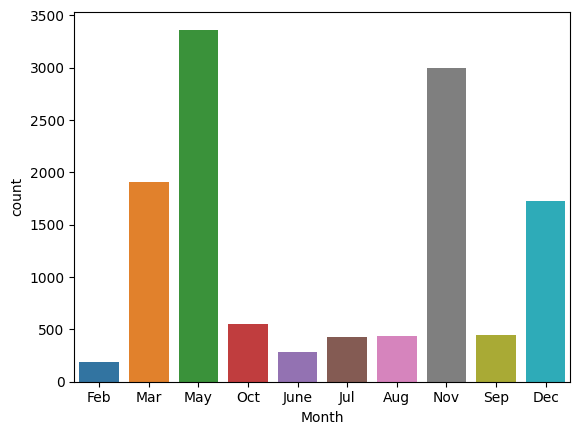

In [16]:
sns.countplot(data=df,x='Month')

## Method 1 - Preprocessing the features in data

#### Month column does not have January & April months 

In [17]:
dict_1 = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
#values = [1,2,3,4,5,6,7,8,9,10,11,12]
df['Month'].replace(dict_1, inplace=True)

In [18]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [19]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [20]:
# converting the boolean features to integers features
df['VisitorType'] = df['VisitorType'].apply(lambda x:1 if x != 'Returning_Visitor' else 0)

df['Weekend'] = df['Weekend'].apply(lambda x:int(x))

df['Revenue'] = df['Revenue'].apply(lambda x:int(x))

In [21]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [22]:
print(df['Weekend'].value_counts())
print(df['Revenue'].value_counts())

0    9462
1    2868
Name: Weekend, dtype: int64
0    10422
1     1908
Name: Revenue, dtype: int64


In [23]:
# using One Hot Encoder & dummy variable in one go by dropping first variable of each
# making these column object type to performe one hot encoding

df[['Month','OperatingSystems','Browser','Region','TrafficType']] = df[['Month','OperatingSystems','Browser','Region','TrafficType']].astype(str)

df_pre = pd.get_dummies(df, drop_first =True)

In [24]:
df_pre.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,TrafficType_19,TrafficType_2,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


### The Dependent Variable 'Revenue' is imbalace

In [25]:
# split the data into independent variable and dependent variable
x = df_pre.drop(['Revenue'], axis=1)
y = df_pre['Revenue']

In [26]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,TrafficType_19,TrafficType_2,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

### Balancing the data 

In [28]:
# the data is imbalance 
# making data balance by Random Over Sampler

ros=RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

In [29]:
print(Counter(y_ros))

Counter({0: 10422, 1: 10422})


In [30]:
# feature scaling 
# Min Max Scaler (0,1)

#x = scaler.fit_transform(x_ros)
#y = y_ros

In [31]:
# feature scaling
# Standard Scaler

scaler = StandardScaler()
x = scaler.fit_transform(x_ros)
y = y_ros

In [32]:
#spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y_ros, test_size=0.2, random_state=125)

### Model Building

              Method Used  Accuracy
0     Logistic Regression  0.821780
1           Decision Tree  0.955145
2      Random Forest gini  0.963540
3   Random Forest Entropy  0.964260
4  Support Vector Machine  0.868554
5    K Nearest Neighbores  0.812185
6              GaussianNB  0.566323
7             BernoulliNB  0.770928
8       Voting Classifier  0.941713
AxesSubplot(0.125,0.11;0.775x0.77)


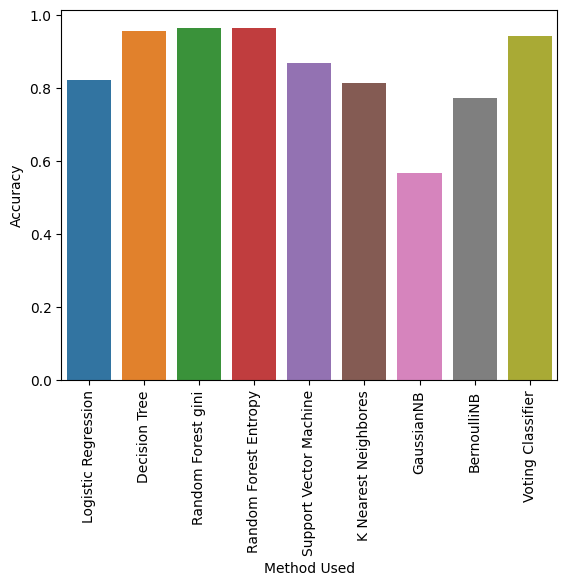

In [33]:
# model building

list_met = []
list_acurracy = []

#model 1
#logistic regression
classifier1 = LogisticRegression(C=0.2, max_iter=1000, solver='liblinear')
lr = classifier1.fit(x_train, y_train)
#prediction
y_pred_lr = classifier1.predict(x_test)
#accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

#model 2 - DT
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
#prediction
y_pred_dt = classifier2.predict(x_test)
#accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

#model 3 - RF criterion= gini
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)
#prediction
y_pred_rfi = classifier3.predict(x_test)
#evaluation
accuracy_rfi = accuracy_score(y_test, y_pred_rfi)

#model 4 - RF criterion= entropy
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(x_train, y_train)
#prediction
y_pred_rfe = classifier4.predict(x_test)
#evaluation
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

#model 5 - SVM 
classifier5 = SVC()  #default is rbf kernal, c=1.0
svm = classifier5.fit(x_train, y_train)
#prediction
y_pred_svm = classifier5.predict(x_test)
#evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)

#model 6 - KNN
classifier6 = KNeighborsClassifier()
knn = classifier6.fit(x_train, y_train)
#prediction
y_pred_knn = classifier6.predict(x_test)
#evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#model 7- naive bayes
classifier7 = GaussianNB()
gnb = classifier7.fit(x_train, y_train)
#prediction
y_pred_gnb = classifier7.predict(x_test)
#evaluaton
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

#model 8- naive bayes
classifier8 = BernoulliNB()
bnb = classifier8.fit(x_train, y_train)
#prediction
y_pred_bnb = classifier8.predict(x_test)
#evaluaton
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

# combination of all the above model by using voting classifier model
evc = VotingClassifier(estimators=[('LR',lr),('DT',dt),('RFI',rfi),('RFE',rfe),('SVM',svm),
                                   ('KNN',knn),('GNB',gnb),('BNB',bnb)], voting='hard', flatten_transform=True)
model_evc = evc.fit(x_train,y_train)
#prediction
pred_evc=evc.predict(x_test)
#evaluation
accuracy_evc=accuracy_score(y_test,pred_evc)

list1 = ['Logistic Regression','Decision Tree','Random Forest gini',
         'Random Forest Entropy','Support Vector Machine','K Nearest Neighbores',
         'GaussianNB','BernoulliNB','Voting Classifier']
list2 = [accuracy_lr,accuracy_dt,accuracy_rfi,accuracy_rfe,accuracy_svm,accuracy_knn,accuracy_gnb,accuracy_bnb,accuracy_evc]
list3 = [classifier1,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7,classifier8,evc]

df_accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used',  y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(),rotation=90)
print(charts)

In [34]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [35]:
y_pred_xgb = model_xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb))

0.9457903573998561


In [36]:
# RF entropy
y_pred_train = classifier4.predict(x_train)
y_pred_test = classifier4.predict(x_test)

#### Matrix, Classification Report & accuracy of RAnfom Forest Entropy  

In [37]:
#accuracy score
accuracy_training_ent = accuracy_score(y_train,y_pred_train)
accuracy_testing_ent = accuracy_score(y_test,y_pred_test)

print('Entropy Training Accuracy = {}'.format(accuracy_training_ent))
print('Entropy Testing Accuracy = {}'.format(accuracy_testing_ent))

# confusion Matrix
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

# Classification report
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

Entropy Training Accuracy = 1.0
Entropy Testing Accuracy = 0.9642600143919405
[[8391    0]
 [   0 8284]]
[[1886  145]
 [   4 2134]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8391
           1       1.00      1.00      1.00      8284

    accuracy                           1.00     16675
   macro avg       1.00      1.00      1.00     16675
weighted avg       1.00      1.00      1.00     16675

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2031
           1       0.94      1.00      0.97      2138

    accuracy                           0.96      4169
   macro avg       0.97      0.96      0.96      4169
weighted avg       0.97      0.96      0.96      4169



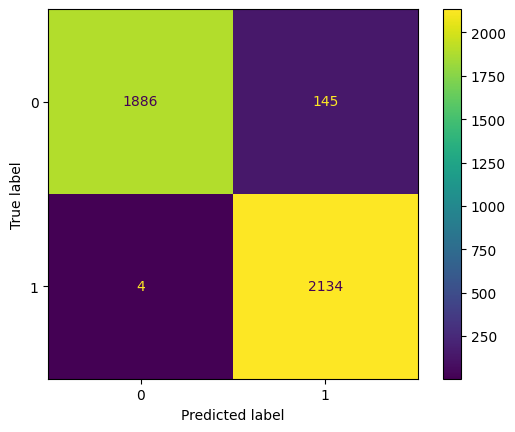

In [38]:
#creating confusion matrix
plot_confusion_matrix(classifier4, x_test, y_test)

In [39]:
accuracy_training_ent = accuracy_score(y_train,y_pred_train)
accuracy_testing_ent = accuracy_score(y_test,y_pred_test)

print('Entropy Training Accuracy = {}'.format(accuracy_training_ent))
print('Entropy Testing Accuracy = {}'.format(accuracy_testing_ent))

Entropy Training Accuracy = 1.0
Entropy Testing Accuracy = 0.9642600143919405


In [40]:
# k fold method cross validation approuch
accuracy_training = cross_val_score(classifier4, x_train, y_train, cv=10)
accuracy_testing = cross_val_score(classifier4, x_test, y_test, cv=10)

print('accuracy_training = {}'.format(accuracy_training))
print('accuracy_testing = {}'.format(accuracy_testing))

accuracy_training = [0.95803357 0.96342926 0.9616307  0.95683453 0.96582734 0.95920816
 0.96220756 0.96220756 0.96220756 0.95980804]
accuracy_testing = [0.90407674 0.93045564 0.90407674 0.88489209 0.88489209 0.9088729
 0.89928058 0.89928058 0.91606715 0.90144231]


In [41]:
print('accuracy_training = {}'.format(accuracy_training[2]))
print('accuracy_testing = {}'.format(accuracy_testing[2]))

accuracy_training = 0.9616306954436451
accuracy_testing = 0.9040767386091128


In [42]:
#from sklearn.model_selection import RandomizedSearchCV

In [43]:
#rf=RandomForestClassifier()


In [44]:
#n_estimators = [int(i) for i in np.linspace(start=200, stop=2000, num=10)]
#max_features = ['Auto', 'sqrt', 'log2']
#max_depth = [int(i) for i in np.linspace(10,1000,10)]
#min_samples_split = [2,5,10,14]
#min_samples_leaf = [1,2,4,6,8]
#
#ramdom_grid = {'n_estimators': n_estimators, 
#               'max_features': max_features, 
#               'max_depth': max_depth,
#              'min_samples_split': min_samples_split, 
#               'min_samples_leaf': min_samples_leaf,
#              'criterion' : ['entropy', 'gini']}
#print(ramdom_grid)

In [45]:
#rf_randomized = RandomizedSearchCV(estimator=rf, param_distributions=ramdom_grid,
#                                   n_iter=100, cv=5,verbose=2, n_jobs=-1, random_state=123)
#rf_randomized.fit(x_train, y_train)

In [46]:
#from sklearn import metrics

In [47]:
#randomize_predictions=rf_randomized.predict(x_test)
#print('Accuracy score : ')
#print(metrics.accuracy_score(y_test, randomize_predictions))
#print('Tunned Hyperparameter k : {}'.format(rf_randomized.best_params_ ))

In [48]:
# plotting ROC AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_test)
roc_auc

0.963367845172511

In [49]:
def plot_roc(y_test, y_pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)


    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, label = 'ROC Curve (area=%0.2f)'%roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

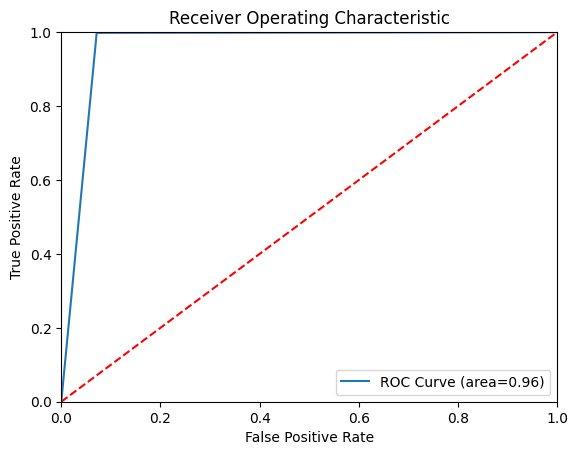

In [50]:
plot_roc(y_test, y_pred_test)

## Method 2 - Removing features from data

In [51]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


<AxesSubplot: xlabel='Month', ylabel='count'>

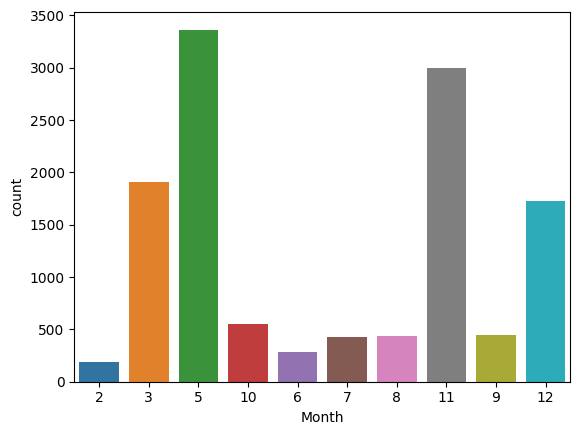

In [52]:
sns.countplot(data=df,x='Month')

<AxesSubplot: xlabel='OperatingSystems', ylabel='count'>

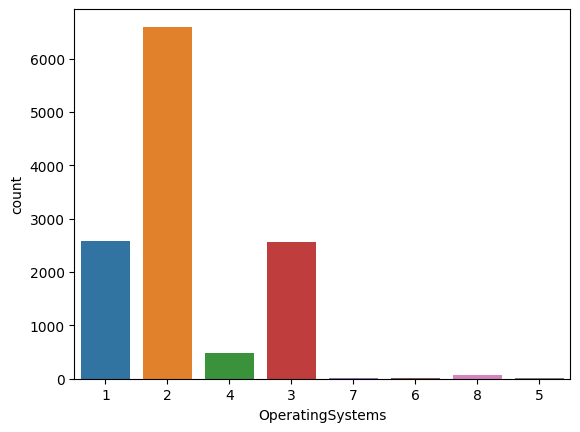

In [53]:
sns.countplot(data=df,x='OperatingSystems')

<AxesSubplot: xlabel='Browser', ylabel='count'>

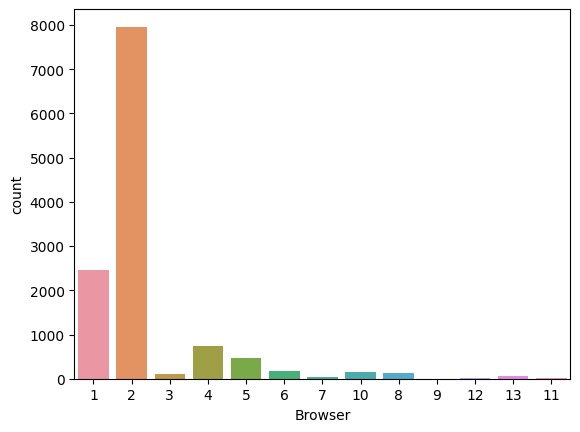

In [54]:
sns.countplot(data=df,x='Browser')

<AxesSubplot: xlabel='Region', ylabel='count'>

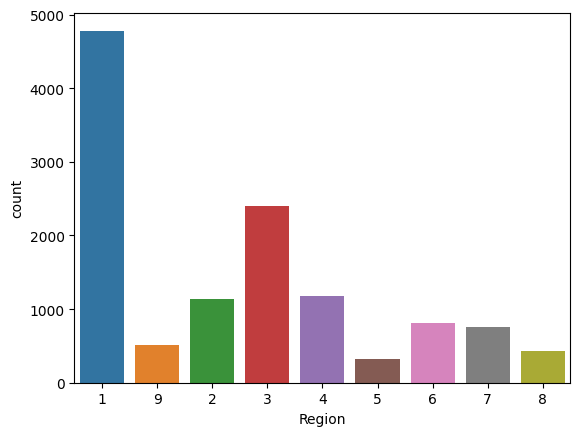

In [55]:
sns.countplot(data=df,x='Region')

<AxesSubplot: xlabel='TrafficType', ylabel='count'>

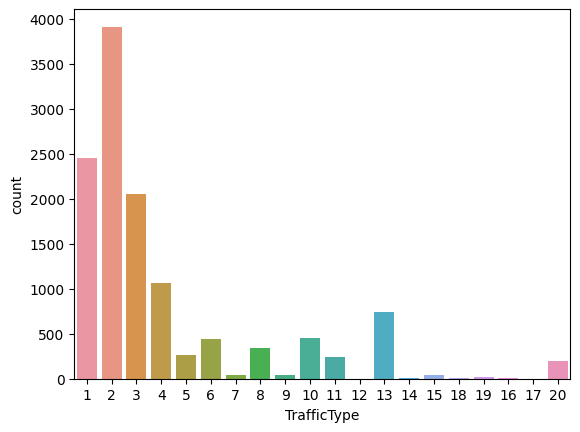

In [56]:
sns.countplot(data=df,x='TrafficType')

<AxesSubplot: >

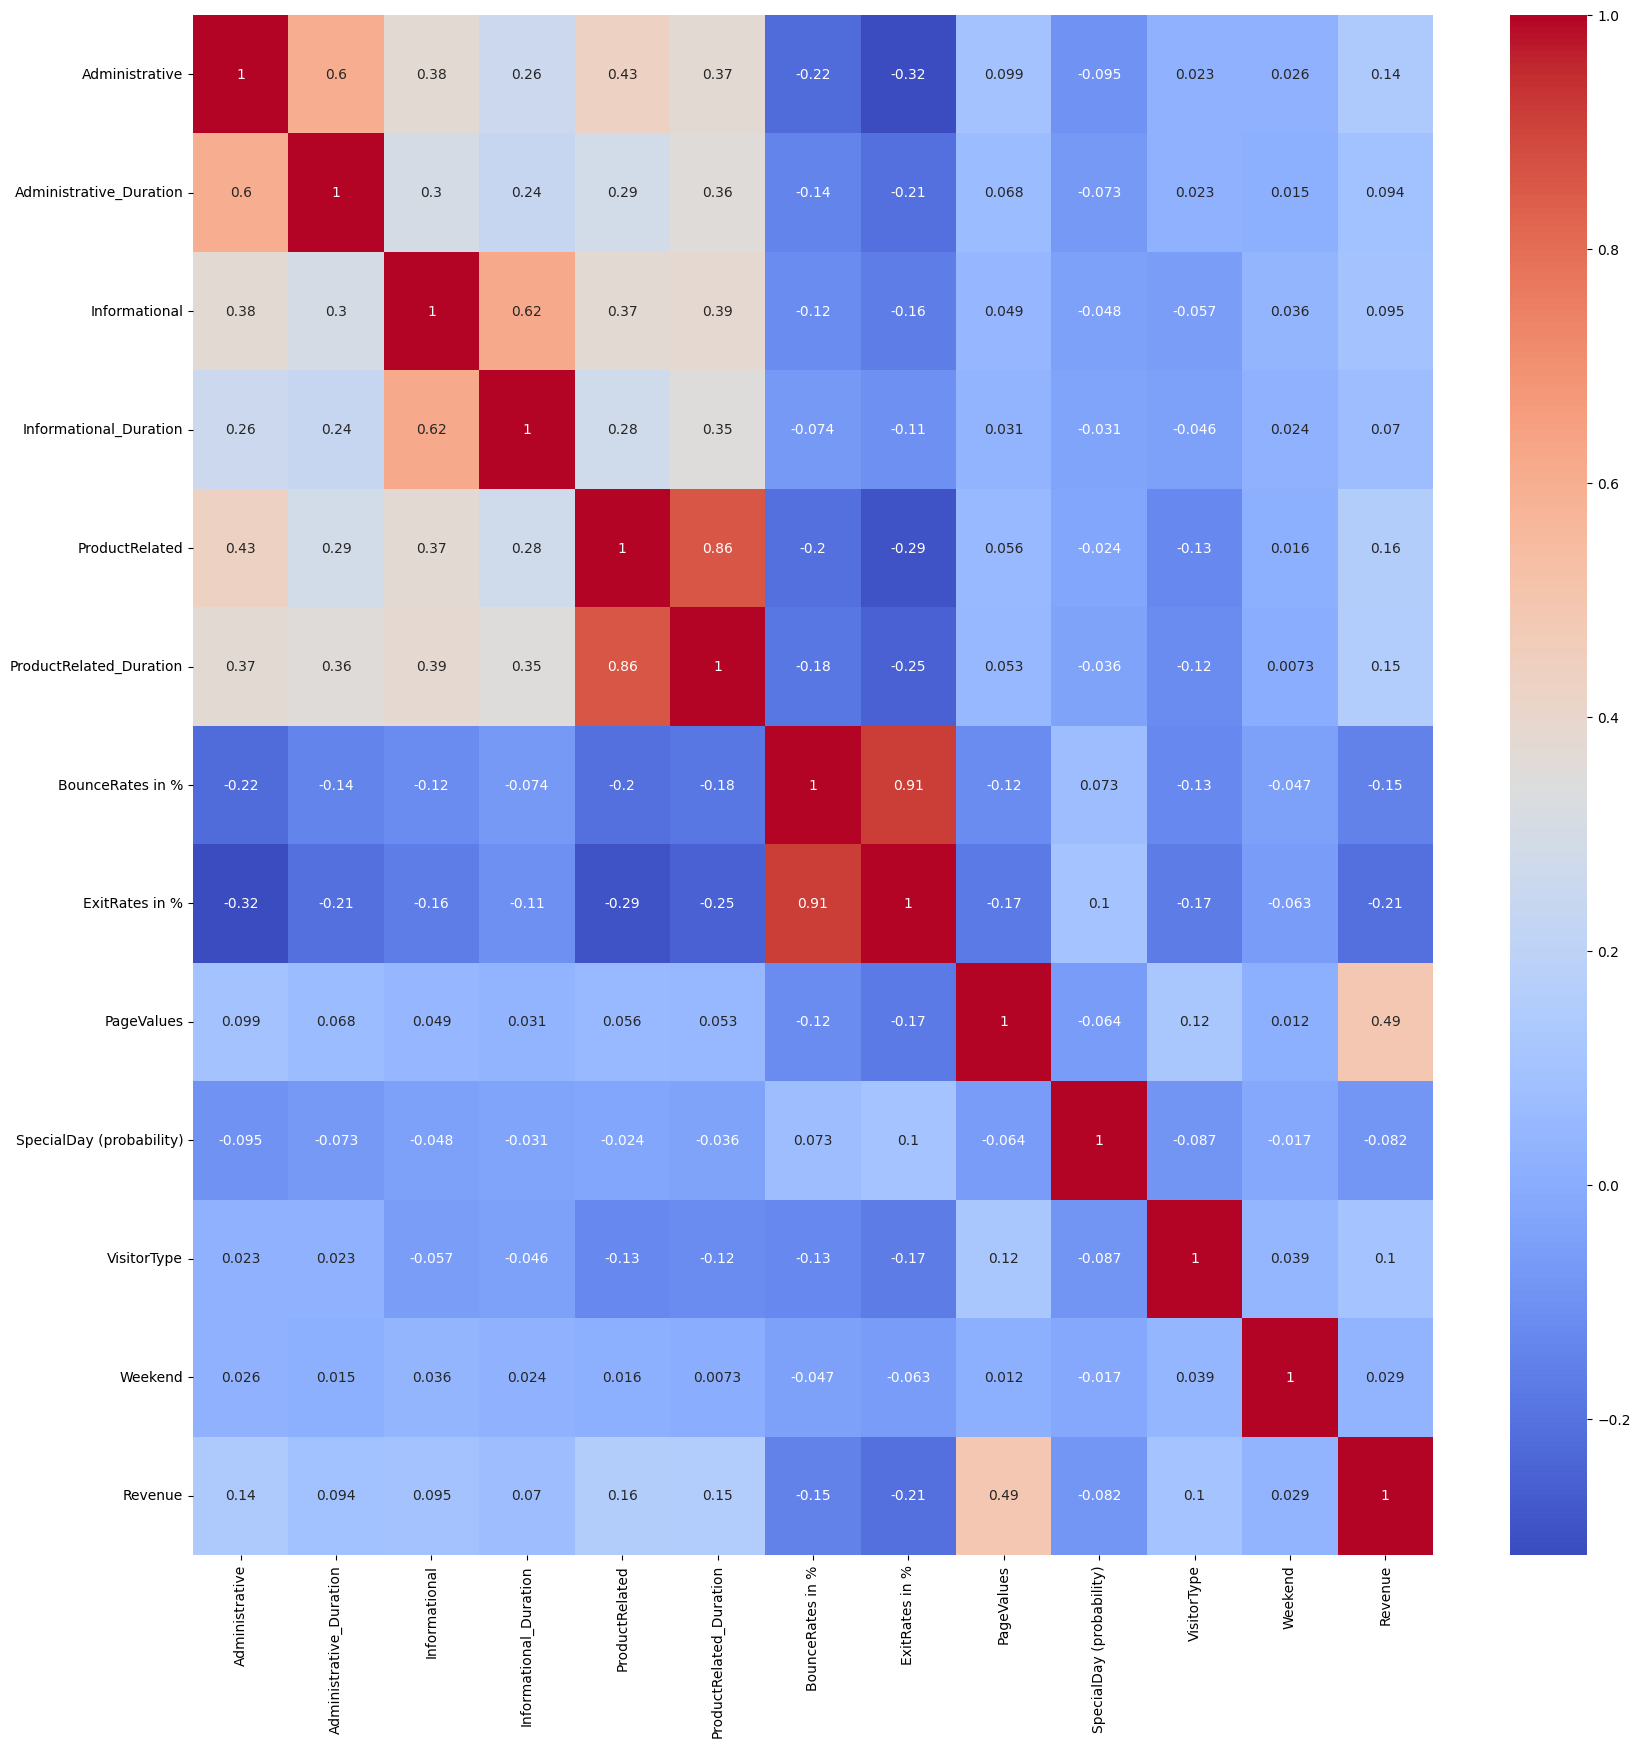

In [57]:
# finding the correlation in variables
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [58]:
df_remov = df.drop(['Month','OperatingSystems','Browser','Region','TrafficType'], axis=1)

In [59]:
df_remov.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,1,0


In [60]:
# one hot encoder on visitor type
df_remov = pd.get_dummies(df_remov, columns=['VisitorType'])

In [61]:
df_remov.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Weekend,Revenue,VisitorType_0,VisitorType_1
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0,1,0


In [62]:
#dropping dummy variable
df_remov = df_remov.drop(['VisitorType_0'], axis=1)

In [63]:
# split the data into independent variable and dependent variable
a = df_remov.drop(['Revenue'], axis=1)
b = df_remov['Revenue']

In [64]:
a_ros, b_ros = ros.fit_resample(a,b)

In [65]:
print(Counter(b_ros))

Counter({0: 10422, 1: 10422})


In [66]:
a = scaler.fit_transform(a_ros)
b = b_ros

In [67]:
a_train, a_test, b_train, b_test = train_test_split(a, b_ros, test_size=0.2, random_state=1265)

             Method Used  Accuracy
0     Random Forest gini  0.962341
1  Random Forest Entropy  0.961382
2      Voting Classifier  0.965219
AxesSubplot(0.125,0.11;0.775x0.77)


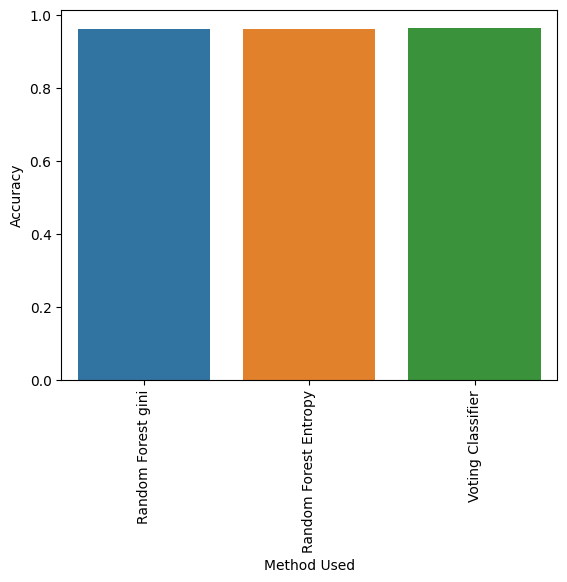

In [68]:
list_met = []
list_acurracy = []

#model 1 - RF criterion= gini
rfi = classifier3.fit(a_train, b_train)
#prediction
b_pred_rfi = classifier3.predict(a_test)
#evaluation
accuracy_rfi = accuracy_score(b_test, b_pred_rfi)

#model 2 - RF criterion= entropy
rfe = classifier4.fit(a_train, b_train)
#prediction
b_pred_rfe = classifier4.predict(a_test)
#evaluation
accuracy_rfe = accuracy_score(b_test, b_pred_rfe)

# combination of all the above model by using voting classifier model
evc = VotingClassifier(estimators=[('RFI',rfi),('RFE',rfe)], voting='hard', flatten_transform=True)
model_evc = evc.fit(a_train,b_train)
#prediction
pred_evc=evc.predict(a_test)
#evaluation
accuracy_evc=accuracy_score(b_test,pred_evc)

list1 = ['Random Forest gini','Random Forest Entropy','Voting Classifier']
list2 = [accuracy_rfi,accuracy_rfe,accuracy_evc]
list3 = [classifier3,classifier4,evc]

df_accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used',  y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(),rotation=90)
print(charts)

In [69]:
model_xgb.fit(a_train,b_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [70]:
b_pred_xgb = model_xgb.predict(a_test)
print(accuracy_score(b_test,b_pred_xgb))

0.9349964020148717


In [71]:
b_pred_train = classifier4.predict(a_train)
b_pred_test = classifier4.predict(a_test)

In [72]:
#accuracy score entropy
remov_accuracy_training_ent = accuracy_score(b_train,b_pred_train)
remov_accuracy_testing_ent = accuracy_score(b_test,b_pred_test)

print('Entropy Training Accuracy on cleaned data = {}'.format(remov_accuracy_training_ent))
print('Entropy Testing Accuracy on cleaned data = {}'.format(remov_accuracy_testing_ent))

# confusion Matrix
print(confusion_matrix(b_train,b_pred_train))
print(confusion_matrix(b_test,b_pred_test))

# Classification report
print(classification_report(b_train,b_pred_train))
print(classification_report(b_test,b_pred_test))

Entropy Training Accuracy on cleaned data = 0.99952023988006
Entropy Testing Accuracy on cleaned data = 0.961381626289278
[[8339    1]
 [   7 8328]]
[[1927  155]
 [   6 2081]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8340
           1       1.00      1.00      1.00      8335

    accuracy                           1.00     16675
   macro avg       1.00      1.00      1.00     16675
weighted avg       1.00      1.00      1.00     16675

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2082
           1       0.93      1.00      0.96      2087

    accuracy                           0.96      4169
   macro avg       0.96      0.96      0.96      4169
weighted avg       0.96      0.96      0.96      4169



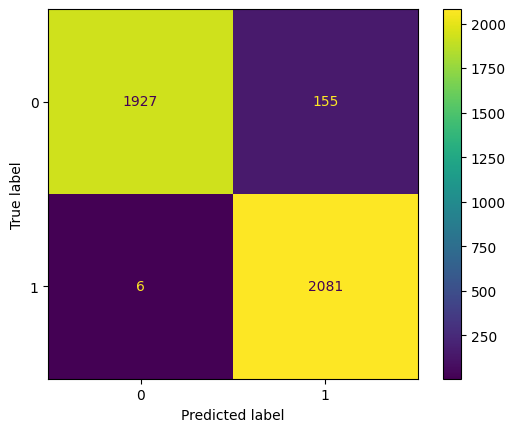

In [73]:
#creating confusion matrix
plot_confusion_matrix(classifier4, a_test, b_test)

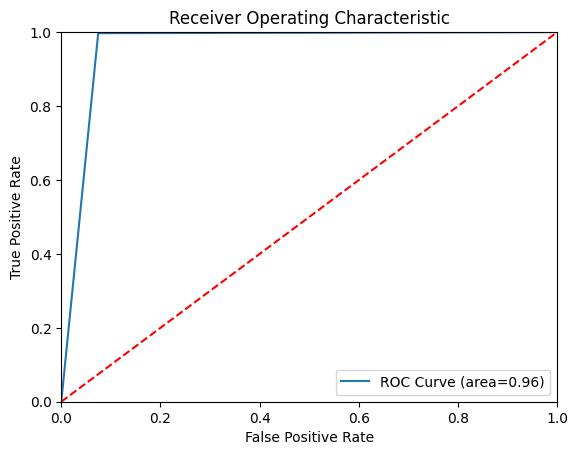

In [74]:
#roc plot entropy
plot_roc(b_test, b_pred_test)

In [75]:
b_pred_train_gini = classifier3.predict(a_train)
b_pred_test_gini = classifier3.predict(a_test)

In [81]:
#accuracy score gini
remov_accuracy_training_gini = accuracy_score(b_train,b_pred_train_gini)
remov_accuracy_testing_gini = accuracy_score(b_test,b_pred_test_gini)

print('Gini Training Accuracy on cleaned data = {}'.format(remov_accuracy_training_gini))
print('Gini Testing Accuracy on cleaned data = {}'.format(remov_accuracy_testing_gini))

# confusion Matrix
print(confusion_matrix(b_train,b_pred_train_gini))
print(confusion_matrix(b_test,b_pred_test_gini))

# Classification report
print(classification_report(b_train,b_pred_train_gini))
print(classification_report(b_test,b_pred_test_gini))

Gini Training Accuracy on cleaned data = 0.99952023988006
Gini Testing Accuracy on cleaned data = 0.9623410889901655
[[8339    1]
 [   7 8328]]
[[1933  149]
 [   8 2079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8340
           1       1.00      1.00      1.00      8335

    accuracy                           1.00     16675
   macro avg       1.00      1.00      1.00     16675
weighted avg       1.00      1.00      1.00     16675

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2082
           1       0.93      1.00      0.96      2087

    accuracy                           0.96      4169
   macro avg       0.96      0.96      0.96      4169
weighted avg       0.96      0.96      0.96      4169



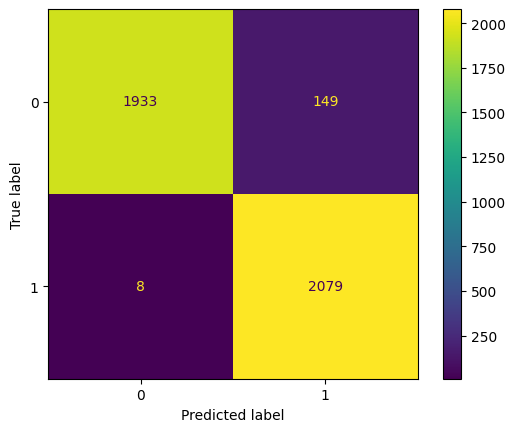

In [77]:
#creating confusion matrix
plot_confusion_matrix(classifier3, a_test, b_test)

In [78]:
# plotting ROC AUC Curve
roc_auc = roc_auc_score(b_test, b_pred_test)
roc_auc

0.9613387067004148

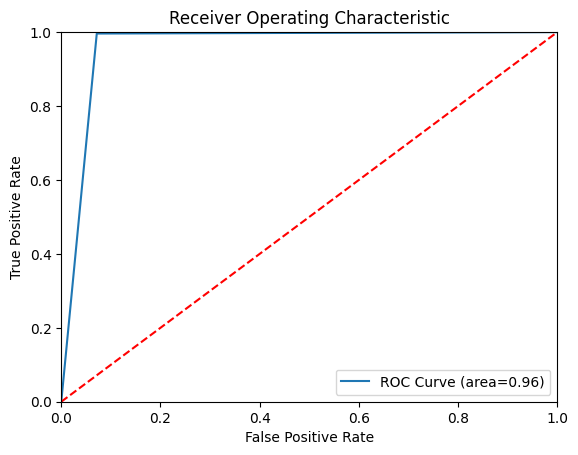

In [79]:
#roc plot gini
plot_roc(b_test, b_pred_test_gini)